2. Moores lag säger att antalet transistorer i en mikroprosessor fördubblas ungefär varje 2 år. Moore's Law over 120 Years 

Stämmer det? Ta in data från https://en.wikipedia.org/wiki/Transistor_count om år och transistorantal (OBS! scraping, tvättning, sorting av data behövs som vanligt), och rita en graf av transistorantalens utveckling. Använd logaritmisk skala på y-axeln, och sätt in en linje som visar vad ökningen borde vara enligt Moores lag. Märk ut några valda punkter med prosessorns namn.

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
page = requests.get('https://en.wikipedia.org/wiki/Transistor_count')

In [3]:
soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
table = soup.find('table', class_='wikitable sortable').findAll('tr')[1:]
print(table)

[<tr>
<td><a href="/wiki/Texas_Instruments_TMS1000" title="Texas Instruments TMS1000">TMS 1000</a></td>
<td>8,000</td>
<td>1974<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></td>
<td><a href="/wiki/Texas_Instruments" title="Texas Instruments">Texas Instruments</a></td>
<td>8,000 nm</td>
<td>11 mm²</td>
</tr>, <tr>
<td><a href="/wiki/Intel_4004" title="Intel 4004">Intel 4004</a></td>
<td>2,300</td>
<td>1971</td>
<td><a href="/wiki/Intel" title="Intel">Intel</a></td>
<td>10,000 nm</td>
<td>12 mm²</td>
</tr>, <tr>
<td><a href="/wiki/Intel_8008" title="Intel 8008">Intel 8008</a></td>
<td>3,500</td>
<td>1972</td>
<td>Intel</td>
<td>10,000 nm</td>
<td>14 mm²</td>
</tr>, <tr>
<td><a href="/wiki/MOS_Technology_6502" title="MOS Technology 6502">MOS Technology 6502</a></td>
<td>3,510<sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></td>
<td>1975</td>
<td><a href="/wiki/MOS_Technology" title="MOS Technology">MOS Technology</a></td>
<td>8,000 

In [5]:
import re
tablist = []

for r in table:
    year = r.findAll('td')[2].get_text()[0:4]
    unfcount = r.findAll('td')[1].get_text()
    name = r.findAll('td')[0].get_text()
    # Remove all thrash.
    filtered = re.sub(r'\[.*?\]', '', unfcount)
    count = filtered.replace(',',"")
    tablist.append([year, count, name])

In [6]:
df = pd.DataFrame(tablist, columns=['year','count','name'])
df['count'] = df['count'].apply(pd.to_numeric, errors='coerce')

In [7]:
df.head()

,year,count,name
0,1974,8000,TMS 1000
1,1971,2300,Intel 4004
2,1972,3500,Intel 8008
3,1975,3510,MOS Technology 6502
4,1974,4100,Motorola 6800


In [8]:
grouped = df.groupby('year').agg({'count': 'sum'})
grouped.head()

,count
year,
1971,2300
1972,3500
1974,21600
1975,3510
1976,15000


In [9]:
exponential = []
previous = grouped['count'].iloc[0]

for i in range(len(grouped)):
    if(i == 0):
        print('first:')
        exponential.append(grouped['count'].iloc[0])
    elif(i % 2 == 0):
        exp = previous * 2
        exponential.append(exp)
        previous = exp
    else:
        exponential.append(previous * 1.5)
print(exponential)

first:
[2300, 3450.0, 4600, 6900.0, 9200, 13800.0, 18400, 27600.0, 36800, 55200.0, 73600, 110400.0, 147200, 220800.0, 294400, 441600.0, 588800, 883200.0, 1177600, 1766400.0, 2355200, 3532800.0, 4710400, 7065600.0, 9420800, 14131200.0, 18841600, 28262400.0, 37683200, 56524800.0, 75366400, 113049600.0, 150732800, 226099200.0, 301465600, 452198400.0, 602931200, 904396800.0, 1205862400, 1808793600.0, 2411724800, 3617587200.0, 4823449600]


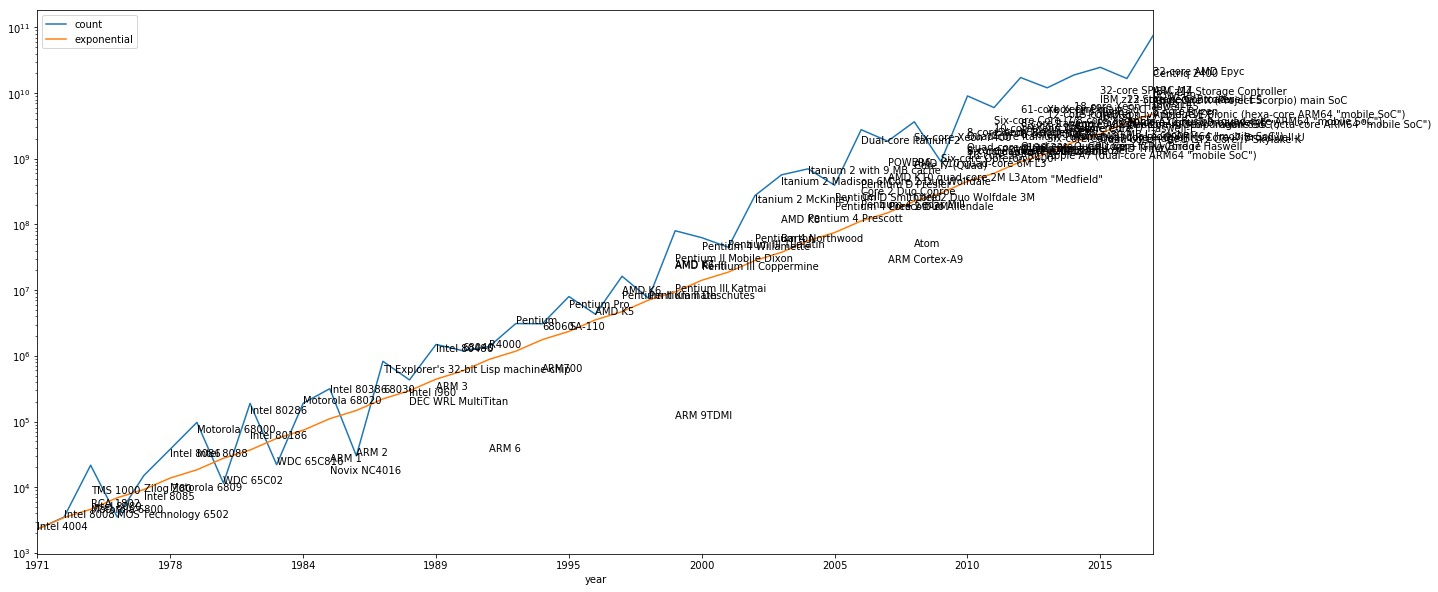

In [87]:
%matplotlib inline
grouped['exponential'] = exponential
ax = grouped.plot(figsize=(20,10),logy=True)
annotatedyear = 0

for i in range(len(df)):
    ax.annotate(df['name'][i],xy=(grouped.index.get_loc(df['year'][i]),df['count'][i]),xytext=(grouped.index.get_loc(df['year'][i]),df['count'][i]))